In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [3]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,716490,3,0,76561197996352631,352,11,1,14.7,"December 9, 2018",Recommended to anyone how like coding challeng...
1,716490,8,3,anglegrinder,211,119,-1,0.3,"December 9, 2018",i thought from the preview video this would be...
2,716490,44,0,jennblaze,165,6,1,37.4,"December 8, 2018","For the longest time, I wanted to love Zachtro..."
3,716490,1,1,76561198019573002,32,1,1,57.2,"December 5, 2018",There is only on problem with this game. Steam...
4,716490,0,0,76561198026408206,479,2,1,28.4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС"


In [4]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [5]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [6]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,3,0,1,14.7,"December 9, 2018",Recommended to anyone how like coding challeng...
1,8,3,-1,0.3,"December 9, 2018",i thought from the preview video this would be...
2,44,0,1,37.4,"December 8, 2018","For the longest time, I wanted to love Zachtro..."
3,1,1,1,57.2,"December 5, 2018",There is only on problem with this game. Steam...
4,0,0,1,28.4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС"


In [7]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [8]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1
5,"December 4, 2018",Quite possibly the best programming game ever....,1,0,31.4,1
6,"December 2, 2018",Pretty dope.,0,0,8.1,1
7,"December 2, 2018",One of the best programming games I have ever ...,1,0,17.8,1
8,"December 1, 2018",I have to print out a magazine? What year is it?,1,3,0.1,-1
9,"December 1, 2018",Another perfect game from Zachtronics. They re...,1,0,3.3,1


In [9]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [10]:
import datetime as dt

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  820 non-null    object 
 1   Review_Text     817 non-null    object 
 2   Num_Helpful     820 non-null    int64  
 3   Num_Funny       820 non-null    int64  
 4   Hours_Played    820 non-null    float64
 5   Recommend       820 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 38.6+ KB


In [12]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3972/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1,1544313600
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1,1544313600
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1,1544227200
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1,1543968000
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1,1543881600


In [13]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3972/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1,1544313600,2553
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1,1544313600,2553
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1,1544227200,2553
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1,1543968000,2552
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1,1543881600,2552


In [14]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1,1544313600,2553
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1,1544313600,2553
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1,1544227200,2553
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1,1543968000,2552
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1,1543881600,2552


## - Data Aggregation -

### Number of text reviews per day:

In [15]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2553,"December 9, 2018",Recommended to anyone how like coding challeng...
1,2553,"December 9, 2018",i thought from the preview video this would be...
2,2553,"December 8, 2018","For the longest time, I wanted to love Zachtro..."
3,2552,"December 5, 2018",There is only on problem with this game. Steam...
4,2552,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС"


In [16]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2536,"August 10, 2018",12
1,2536,"August 11, 2018",7
2,2536,"August 12, 2018",9
3,2536,"August 13, 2018",3
4,2536,"August 14, 2018",6
...,...,...,...
419,2702,"October 18, 2021",1
420,2702,"October 20, 2021",1
421,2703,"October 21, 2021",2
422,2703,"October 24, 2021",2


<AxesSubplot:>

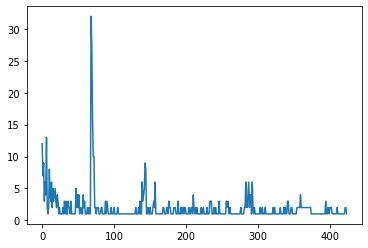

In [17]:
text_days['review_count'].plot()

In [18]:
# total number of text reviews
text_days['review_count'].sum()

820

In [19]:
# average number of text reviews per day
text_days['review_count'].mean()

1.9339622641509433

### Number of text reviews per week:

In [20]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2536,54
1,2537,26
2,2538,22
3,2539,13
4,2540,5
...,...,...
146,2699,1
147,2700,1
148,2702,4
149,2703,4


<AxesSubplot:>

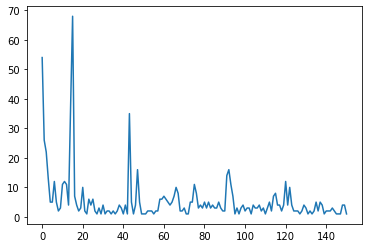

In [21]:
text_weeks['review_count'].plot()

In [22]:
# total number of text reviews
text_weeks['review_count'].sum()

820

In [23]:
# average number of text reviews per week
text_weeks['review_count'].mean()

5.430463576158941

### Num_Helpful per week:

In [24]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1,1544313600,2553
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1,1544313600,2553
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1,1544227200,2553
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1,1543968000,2552
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1,1543881600,2552


In [25]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2536,400
1,2537,15
2,2538,49
3,2539,41
4,2540,3
...,...,...
146,2699,0
147,2700,0
148,2702,0
149,2703,0


In [26]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,152,0,1.0,7.407407
2537,6,0,0.0,0.576923
2538,18,0,0.0,2.227273
2539,23,0,2.0,3.153846
2540,2,0,0.0,0.600000
...,...,...,...,...
2699,0,0,0.0,0.000000
2700,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [27]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

2257

In [28]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

2.752439024390244

### Num_Funny per week:

In [29]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2536,82
1,2537,0
2,2538,3
3,2539,4
4,2540,0
...,...,...
146,2699,0
147,2700,0
148,2702,0
149,2703,0


In [30]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,48,0,0.0,1.518519
2537,0,0,0.0,0.000000
2538,2,0,0.0,0.136364
2539,3,0,0.0,0.307692
2540,0,0,0.0,0.000000
...,...,...,...,...
2699,0,0,0.0,0.000000
2700,0,0,0.0,0.000000
2702,0,0,0.0,0.000000


In [31]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

562

In [32]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.6853658536585366

### Hours_Played per week:

In [33]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2536,1710.4
1,2537,772.4
2,2538,1149.4
3,2539,342.9
4,2540,202.2
...,...,...
146,2699,30.9
147,2700,13.1
148,2702,79.1
149,2703,118.3


In [34]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,262.5,2.2,18.9,31.674074
2537,153.6,3.7,19.9,29.707692
2538,296.1,0.2,30.8,52.245455
2539,65.4,4.0,21.0,26.376923
2540,118.0,1.9,23.3,40.440000
...,...,...,...,...
2699,30.9,30.9,30.9,30.900000
2700,13.1,13.1,13.1,13.100000
2702,25.4,4.1,24.8,19.775000


In [35]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

29344.2

In [36]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

35.78560975609755

### Recommend per week:

In [37]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2536,0.962963
1,2537,1.000000
2,2538,0.909091
3,2539,1.000000
4,2540,1.000000
...,...,...
146,2699,1.000000
147,2700,1.000000
148,2702,1.000000
149,2703,1.000000


In [38]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2536,1,-1,1.0,0.962963
2537,1,1,1.0,1.000000
2538,1,-1,1.0,0.909091
2539,1,1,1.0,1.000000
2540,1,1,1.0,1.000000
...,...,...,...,...
2699,1,1,1.0,1.000000
2700,1,1,1.0,1.000000
2702,1,1,1.0,1.000000


In [39]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

760

In [40]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.926829268292683

## Feature Scaling - Min-Max Normalization

In [41]:
df_min_max_scaled = df.copy()

In [42]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,14.7,1,1544313600,2553
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.3,-1,1544313600,2553
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,37.4,1,1544227200,2553
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,57.2,1,1543968000,2552
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,28.4,1,1543881600,2552


In [43]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"December 9, 2018",Recommended to anyone how like coding challeng...,3,0,0.027762,1.0,0.103565,2553
1,"December 9, 2018",i thought from the preview video this would be...,8,3,0.000380,0.0,0.103565,2553
2,"December 8, 2018","For the longest time, I wanted to love Zachtro...",44,0,0.070926,1.0,0.102716,2553
3,"December 5, 2018",There is only on problem with this game. Steam...,1,1,0.108576,1.0,0.100170,2552
4,"December 4, 2018","Come for the hacking, stay for the ПАСЬЯНС",0,0,0.053813,1.0,0.099321,2552
...,...,...,...,...,...,...,...,...
815,"June 28, 2020",Really recommend if you like these kinds of ga...,0,0,0.057235,1.0,0.584890,2634
816,"June 27, 2020",Fun little programming puzzle game with a mix ...,0,0,0.032706,1.0,0.584041,2634
817,"June 27, 2020",My first zachtronic game I think I might go bu...,0,0,0.046016,1.0,0.584041,2634
818,"June 27, 2020",yep,0,0,0.027762,1.0,0.584041,2634


In [44]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
df_sorted = df_sorted.reset_index(drop=True)

In [47]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3972/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [49]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 30, 2021",MARK LOPKILLJUMP LOP,0,0,0.009127,1.0,1.000000,2704
1,"October 24, 2021",compiuter,0,0,0.010839,1.0,0.994907,2703
2,"October 24, 2021",If you like logic puzzles (often VERY difficul...,0,0,0.160867,1.0,0.994907,2703
3,"October 21, 2021",The number 1 reason I don't get enough sleep.,0,0,0.029473,1.0,0.992360,2703
4,"October 21, 2021",Coding is COOL,0,0,0.023008,1.0,0.992360,2703
5,"October 20, 2021",The best Zachtronics game so far! (if you have...,0,0,0.046207,1.0,0.991511,2702
6,"October 18, 2021",yes,0,0,0.048108,1.0,0.989813,2702
7,"October 15, 2021","The gameplay is simple but fun, the difficulty...",0,0,0.007606,1.0,0.987267,2702
8,"October 14, 2021",This game takes the usual puzzle-solving fun o...,0,0,0.047728,1.0,0.986418,2702
9,"October 6, 2021",NaN,0,0,0.024720,1.0,0.979626,2700


In [50]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [51]:
df_text_list

Date_Epoch_Week
2536    [Surprised I've never heard of this developer....
2537    [We are back to 'assembler code' puzzles, and ...
2538    [really very good programming game!, Another g...
2539    [The previous zachtronics programming games we...
2540    [(tl;dr I recommend, but the game gets very bo...
2541    [Probably one of the best games I've ever play...
2542    [I read an interview with the creator of Zacht...
2543    [Absolutely Spectacular. Zachtronic's best yet...
2544    [As usual zachtonics delivers an amazing puzzl...
2545    [At first this game didn't feel like a hacking...
2546    [I started the game. I listened to all the tut...
2547    [Note to my cyberpunk future-self: Don't becom...
2548    [I'm loving this puzzlegame. You don't need to...
2549    [Solving these puzzles makes me feel less stup...
2550    [I enjoyed the other Zachtronics games, especi...
2551    [This game has so much depth it's incredible.A...
2552    [There is only on problem with this game. Stea..

In [52]:
# storing data in JSON format
df_text_list.to_json('exapunks_text.json', orient = 'split', compression = 'infer')

In [53]:
# reading the JSON file
game_text = pd.read_json('exapunks_text.json')
print(game_text)

            name  index                                               data
0    Review_Text   2536  [Surprised I've never heard of this developer....
1    Review_Text   2537  [We are back to 'assembler code' puzzles, and ...
2    Review_Text   2538  [really very good programming game!, Another g...
3    Review_Text   2539  [The previous zachtronics programming games we...
4    Review_Text   2540  [(tl;dr I recommend, but the game gets very bo...
5    Review_Text   2541  [Probably one of the best games I've ever play...
6    Review_Text   2542  [I read an interview with the creator of Zacht...
7    Review_Text   2543  [Absolutely Spectacular. Zachtronic's best yet...
8    Review_Text   2544  [As usual zachtonics delivers an amazing puzzl...
9    Review_Text   2545  [At first this game didn't feel like a hacking...
10   Review_Text   2546  [I started the game. I listened to all the tut...
11   Review_Text   2547  [Note to my cyberpunk future-self: Don't becom...
12   Review_Text   2548  

In [54]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('exapunks_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3972/1506400886.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [55]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('exapunks_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_3972/77157315.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [56]:
# storing data in CSV format
game_review = df_sorted.to_csv('exapunks_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])